# ¿Cómo entrenar un modelo de word embeddings?

En este notebook, aprenderemos a construir un modelo de word embeddings a partir de una colección de textos. Para ello, utilizaremos la librería [Gensim](#https://radimrehurek.com/gensim/).

El primer paso será instalar esta librería. En algunos casos, tendrás que reinicir el entorno de ejecución. 

**Nota:** Hay un problemas de incompatibilidad de versiones entre la versión de numpy (numpy-1.22.4) que usa gensim, y la versión actual de numpy instalada en Google Colab (numpy 1.24.1). Por esa razón, debemos desinstalar gensim, y volver a instalar gensim, para forzar a que se copia la versión antigua de numpy. Además, tendrás que reiniciar.



In [ ]:
!pip uninstall gensim
!pip install gensim



Found existing installation: gensim 4.3.0
Uninstalling gensim-4.3.0:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/gensim-4.3.0.dist-info/*
    /usr/local/lib/python3.8/dist-packages/gensim/*
Proceed (Y/n)? Y
  Successfully uninstalled gensim-4.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached gensim-4.3.0-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (24.1 MB)


Para entrenar un modelo de word embeddings necesitaríamos una gran colección de textos (por ejemplo, todos los textos de wikipedia). El proceso podría tardar horas. 

A modo de ejemplo, en este notebook, únicamente utilizaremos un conjunto de oraciones. 

El modelo necesita como entrada que los textos sean tokenizados. Podríamos utlizar el método split de str, pero como ya conocemos librerías como Spacky o nltk, utilizaremos una de ellas que nos proporcionan una tokenización más correcta que la obtenida con split(): 

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

# esta es nuestra colección de textos que usaremos para entrenar el modelo de 
# word embeddings
texts=["Billy always listens to his mother", 
       "He always does what she says", 
       "If his mother says, 'Brush your teeth' Billy brushes his teeth", 
       "If his mother says, 'Go to bed' Billy goes to bed", 
       "Billy is a very good boy", 
       "A good boy listens to his mother"] 

def tokenization(texts):
    """gets a list of sentences and returns a list of lists of tokens"""
    sequences_of_tokens=[]
    for text in texts: 
        doc = nlp(text)
        tokens=[]
        for token in doc:
            tokens.append(token.text.lower())
        sequences_of_tokens.append(tokens)
    
    return sequences_of_tokens


sequences=tokenization(texts)
print(sequences)


/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


[['billy', 'always', 'listens', 'to', 'his', 'mother'], ['he', 'always', 'does', 'what', 'she', 'says'], ['if', 'his', 'mother', 'says', ',', "'", 'brush', 'your', 'teeth', "'", 'billy', 'brushes', 'his', 'teeth'], ['if', 'his', 'mother', 'says', ',', "'", 'go', 'to', 'bed', "'", 'billy', 'goes', 'to', 'bed'], ['billy', 'is', 'a', 'very', 'good', 'boy'], ['a', 'good', 'boy', 'listens', 'to', 'his', 'mother']]


Una vez que tenemos la colección de textos tokenizados, ya podemos entrenar el modelo. Como hemos dicho antes, utilizaremos la librería Gensim, y en particular, su paquete Word2Vec:

In [ ]:
from gensim.models import Word2Vec

# min_count: ignorar todas las palabras que aparezcan menos de dos veces.
# vector_size: la dimensión de los vectores
model = Word2Vec(sequences, vector_size=10, min_count=2, epochs=100) #min_count=2, ignore all words with a frequency < 2

# devuelve un diccionario, donde cada palabra tiene asociado un vector
word_vectors = model.wv
print(model)

Word2Vec<vocab=15, vector_size=10, alpha=0.025>


In [ ]:
vector = word_vectors['mother']  # numpy vector of a word
print(vector.shape)
print(vector)

(10,)
[ 0.07275508  0.05213695  0.07103128  0.01267101  0.06508178 -0.03744158
 -0.00079871  0.06797002 -0.08599492 -0.0421496 ]


In [ ]:
word_vectors.most_similar('mother')


[('teeth', 0.5320941805839539),
 ('good', 0.4433230459690094),
 ("'", 0.42452216148376465),
 ('his', 0.4015263020992279),
 ('if', 0.327894389629364),
 (',', 0.06807553768157959),
 ('bed', 0.06263464689254761),
 ('boy', 0.00275197415612638),
 ('a', -0.02174053154885769),
 ('listens', -0.04804342985153198)]

Recuerda que también podemos utilizar el método **similar_by_word**:

In [ ]:
result = word_vectors.similar_by_word("mother") #cat
for r in result:
    print(r)

#most_similar_key, similarity = result[0]  # look at the first match
#print(f"{most_similar_key}: {similarity:.4f}")

('teeth', 0.5320941805839539)
('good', 0.4433230459690094)
("'", 0.42452216148376465)
('his', 0.4015263020992279)
('if', 0.327894389629364)
(',', 0.06807553768157959)
('bed', 0.06263464689254761)
('boy', 0.00275197415612638)
('a', -0.02174053154885769)
('listens', -0.04804342985153198)


En la siguiente celda, como la palabra 'sister' no existe en el vocabulario que se ha creado a partir de las ocho oraciones, el código lanza una excepción

In [ ]:
word_vectors.most_similar('sister')


Podemos guardar el modelo en local:

In [ ]:
from gensim.models import KeyedVectors
word_vectors.save('model.bin')
my_model = KeyedVectors.load('model.bin')
print("vector:", my_model['mother'])


vector: [ 0.07275508  0.05213695  0.07103128  0.01267101  0.06508178 -0.03744158
 -0.00079871  0.06797002 -0.08599492 -0.0421496 ]


La siguiente función nos permite representar el espacio de los vectores de las palabras:

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


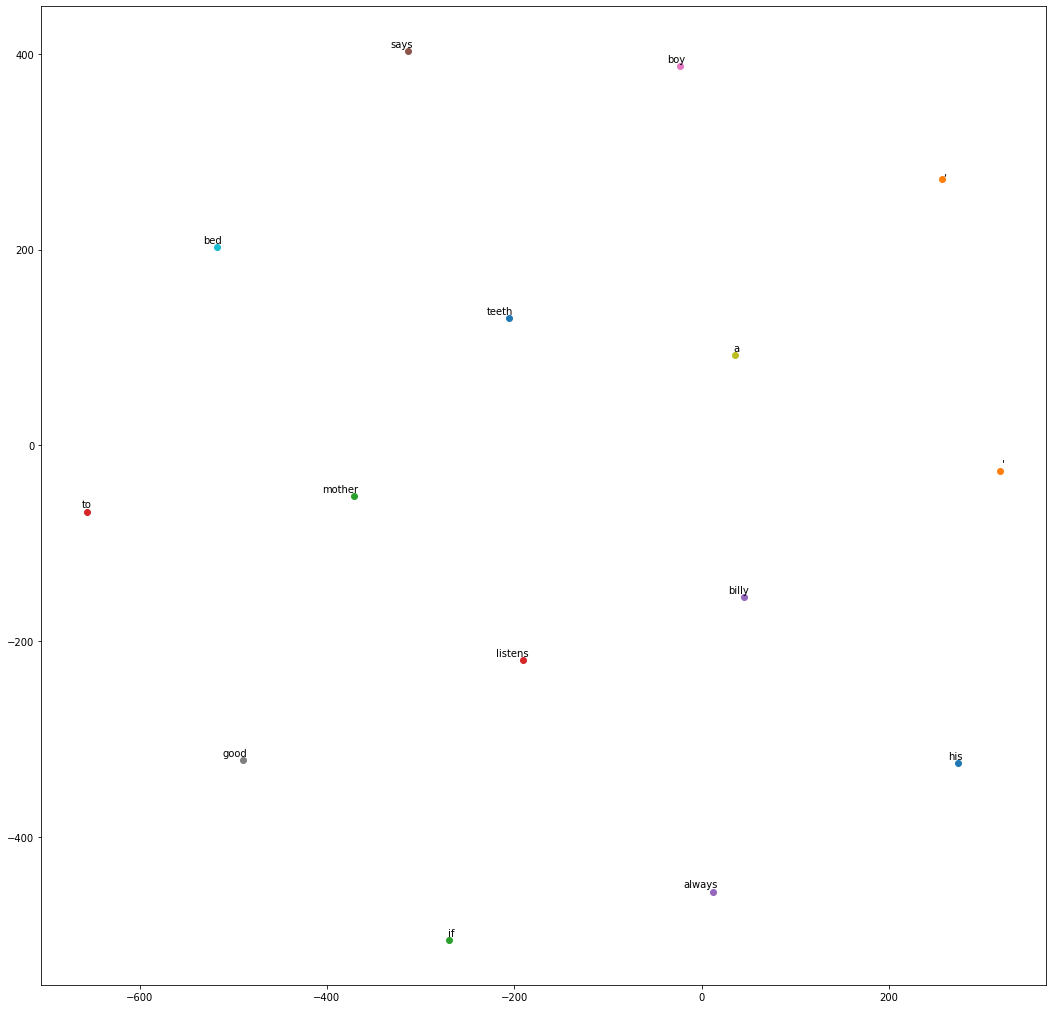

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def tsne_plot(word_vectors):
    "Create TSNE model and plot it"
    labels = []
    tokens = []

    words=list(word_vectors.index_to_key)
    for word in words:
        tokens.append(word_vectors[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(18, 18)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
   
tsne_plot(word_vectors)

## Ejercicio

Entrena un modelo de word embeddings utilizando los textos del dataset sobre sarcamo (disponible en aula global). La dimensión de los vectores debe ser 50. 

Si lo deseas, también puedes utilizar otros datasets. Recuerda que cuanto mayor sea el número de textos, mejor será la calidad de nuestros vectores.